In [ ]:
import pandas as pd
import math
import re
from collections import Counter


df = pd.read_csv('result_cv_all.csv')
df_2 = pd.read_csv('result_tfidf_all.csv')

In [ ]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

cs = []
for index, row in df.iterrows():
  for index_2, row_2 in df.iterrows():
    text1 = row["text"]
    text2 = row_2["text"]
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    cosine = get_cosine(vector1, vector2)
    if cosine > .5:
      if text1 == text2:
        print("same sentence")
    else:
      cs.append(cosine)



same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same sentence
same s

In [ ]:
import statistics
print("mean cosine similarity value: " + str(statistics.mean(cs)))



mean cosine similarity value: 0.07954625466406127


In [ ]:
import nltk
nltk.download('stopwords')

def remove_special_characters(text):
    retVal = text
    retVal = retVal.replace('\n',' ')
    retVal = retVal.replace('\r',' ')
    retVal = retVal.replace('\t',' ')
    return retVal

df['text'] = df['text'].apply(remove_special_characters)
#print(df.head(5))

# convert to lower case
df['text'] = df['text'].str.lower()
#print(df.head(5))

# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df.head(5))

                                                text  label
0  wikileaks clinton confidant raised money found...      1
1  strong defense relationship britain continue p...      0
2  la times ’the free speech movement berkeley’ b...      0
3  house intel panel advances nsa spying bill des...      0
4  long days google docs anonymous surveys us soc...      0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#calculating word count

list_of_words = []
for index, row in df.iterrows():
  sentence = row["text"]
  words = sentence.split()
  for word in words:
    list_of_words.append(word)

print(list_of_words)


['wikileaks', 'clinton', 'confidant', 'raised', 'money', 'foundation', 'got', 'bill', 'paid', 'gigs', 'email', 'internal', 'memo', 'released', 'wednesday', 'wikileaks', 'reveals', 'longtime', 'clinton', 'confidant', 'played', 'unorthodox', 'dual', 'role', '–', 'raising', 'money', 'clinton', 'foundation', 'finding', 'paid', 'work', 'bill', 'clinton', 'hill', 'reports', '12page', 'document', 'written', '2011', 'doug', 'band', 'teneo', 'private', 'consulting', 'firm', 'raised', 'millions', 'foundation', 'also', 'scouted', 'paid', 'gigs', 'dubbed', 'bill', 'clinton', 'inc', 'washington', 'examiner', 'reports', 'one', 'instance', 'band', 'secured', '540000', 'donation', 'clinton', 'foundation', 'banking', 'giant', 'ubs', 'later', 'arranged', 'bill', 'clinton', 'give', 'three', 'paid', 'speeches', 'firm', 'total', '900000', 'hill', 'reported', 'memo', 'band', 'argues', 'double', 'duties', 'independent', 'one', 'another', 'memo', 'written', 'chelsea', 'clinton', 'criticized', 'bands', 'role',

In [ ]:
counted = Counter(list_of_words)

In [ ]:
sorted_dict = {}
sorted_keys = sorted(counted, key=counted.get)
sorted_keys.reverse()
for w in sorted_keys:
    sorted_dict[w] = counted[w]

print(sorted_dict)


{'trump': 311, 'said': 281, 'us': 188, 'would': 161, 'president': 142, 'clinton': 128, 'new': 116, 'also': 108, 'people': 106, 'obama': 102, 'one': 93, 'women': 90, 'like': 90, '–': 86, 'house': 82, 'republican': 81, 'news': 81, 'even': 75, 'media': 73, 'last': 73, 'could': 71, 'campaign': 71, 'hillary': 70, 'donald': 68, 'election': 65, 'going': 64, 'state': 64, 'national': 63, 'political': 63, 'democratic': 62, 'first': 62, 'states': 61, '—': 60, 'white': 59, 'party': 59, 'year': 59, 'united': 59, 'two': 57, 'senate': 56, 'reuters': 56, 'iran': 55, 'told': 55, 'deal': 54, 'former': 53, 'says': 52, 'say': 52, 'video': 51, 'nuclear': 51, 'sanders': 50, 'get': 50, 'percent': 50, 'security': 50, '”': 50, 'think': 49, 'many': 49, 'public': 49, 'mr': 48, 'team': 48, 'government': 48, 'way': 48, 'america': 47, 'washington': 47, 'may': 46, 'world': 46, 'since': 45, 'make': 45, 'see': 44, 'including': 43, 'american': 43, 'federal': 43, 'republicans': 43, 'made': 43, 'take': 42, 'presidential'

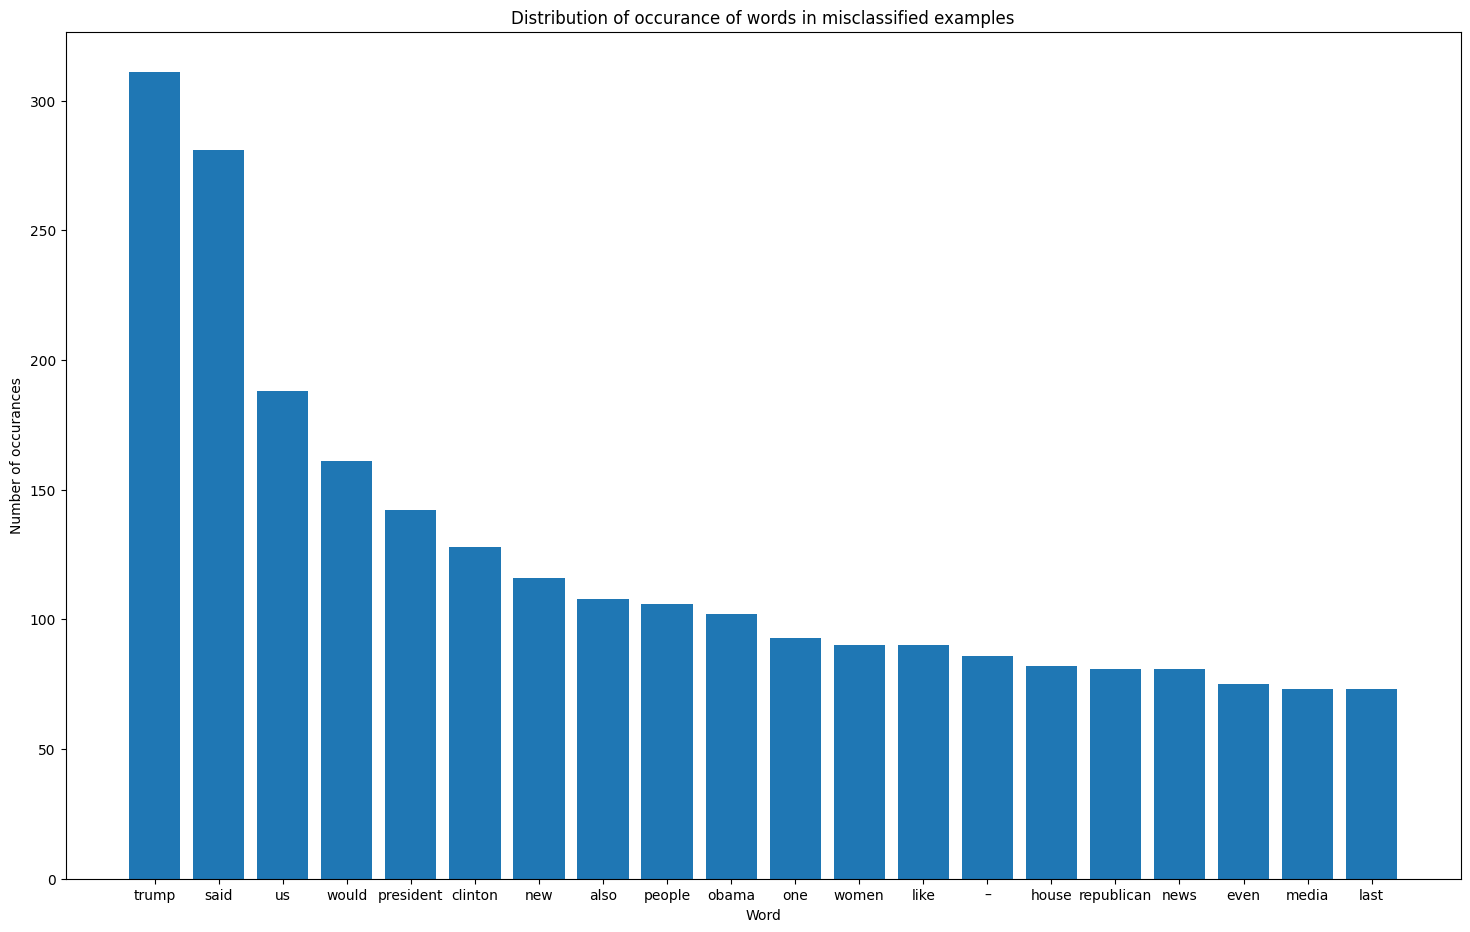

In [ ]:
#print bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(18,11))
plt.bar(list(sorted_dict.keys())[:20], list(sorted_dict.values())[:20])
plt.xlabel("Word")
plt.ylabel("Number of occurances")
plt.title("Distribution of occurance of words in misclassified examples")
plt.show()

In [ ]:
#graph for real vs fake news trump:

#preprocessing block:

df = pd.read_csv("/content/drive/MyDrive/WELFake_Dataset.csv")
df.drop("Unnamed: 0", axis = 1)
df.info()
# merge title and text together
df['text'] = df['title'] + '\n\n\n' + df['text']
df = df[['text', 'label']]
# drop na values
df['text'].isna().sum()
df.head()
# drop empty lines
null0      = df.shape[0]
df         = df[~df['text'].isnull()]
null1      = df.shape[0]
print(f"There are {null0-null1} null found in the dataset")

# drop NaN values
null0      = df.shape[0]
df         = df[~df['text'].isna()]
null1      = df.shape[0]
print(f"There are {null0-null1} null found in the dataset")
import string

def remove_punctuation(text):
    if isinstance(text, str):  # Check if 'text' is a string and not NaN
        punctuation = string.punctuation
        retVal = text
        for char in punctuation:
            retVal = retVal.replace(char, '')
        return retVal
    else:
        return text

df['text'] = df['text'].apply(remove_punctuation)
print(df.head(5))
import nltk
nltk.download('stopwords')

# remove special characters
def remove_special_characters(text):
    retVal = text
    retVal = retVal.replace('\n',' ')
    retVal = retVal.replace('\r',' ')
    retVal = retVal.replace('\t',' ')
    return retVal

df['text'] = df['text'].apply(remove_special_characters)
#print(df.head(5))

# convert to lower case
df['text'] = df['text'].str.lower()
#print(df.head(5))

# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
There are 597 null found in the dataset
There are 0 null found in the dataset
                                                text  label
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1
2  UNBELIEVABLE OBAMA’S ATTORNEY GENERAL SAYS MOS...      1
3  Bobby Jindal raised Hindu uses story of Christ...      0
4  SATAN 2 Russia unvelis an image of its terrify...      1
5  About Time Christian Group Sues Amazon and SPL...      1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  label
0  law enforcement high alert following threats c...      1
2  unbelievable obama’s attorney general says cha...      1
3  bobby jindal raised hindu uses story christian...      0
4  satan 2 russia unvelis image terrifying new ‘s...      1
5  time christian group sues amazon splc designat...      1


In [ ]:
#common words for CV : said
# breitbart
# reuters
# image
#common words for TFIDF:
# said
# obama
# hillary
# video

In [ ]:
news = {"real":0, "fake":0}
i = 0
for index, row in df.iterrows():
  sentence = row["text"]
  words = sentence.split()
  if "said" in words:
    i += 1
    if row["label"] == 1:
      news["real"] += 1
    elif row["label"] == 0:
      news["fake"] += 1

In [ ]:
print(news)

{'real': 18263, 'fake': 31144}


In [ ]:
print(i) #number of datapoints containing <the word>

49407


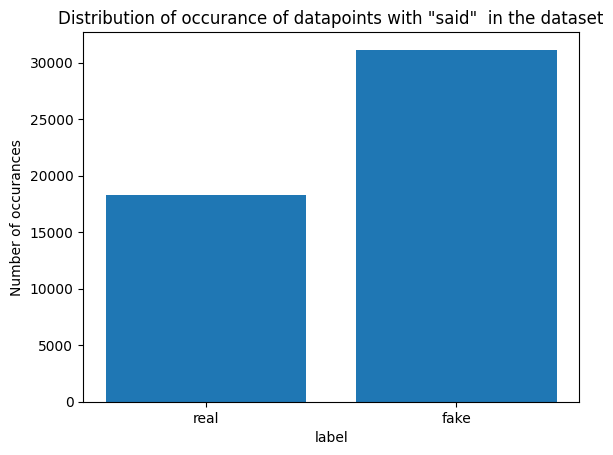

In [ ]:

plt.bar(list(news.keys()), list(news.values()))
plt.xlabel("label")
plt.ylabel("Number of occurances")
plt.title('''Distribution of occurance of datapoints with "said"  in the dataset''')
plt.show()